**Inhalt:** Selbständige Übung in Gruppen

**Nötige Skills:** Time Series

**Lernziele:**
- Selbständig Daten explorieren und Storyideen testen

# Das Beispiel

Covid-Daten aus den Schweizer Kantonen.

- Auswertung einzeln bzw. anhand von Gruppen
- Generierung von Story-Ideen und Plotten

Die Daten stammen von dieser Quelle: https://github.com/openZH/covid_19

# Vorbereitung

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
%matplotlib inline

## Daten laden

### 1. Fallzahlen

Wir können die Daten direkt von Github beziehen

In [4]:
path = 'https://github.com/openZH/covid_19/raw/master/COVID19_Fallzahlen_CH_total_v2.csv'

In [5]:
df = pd.read_csv(path)

In [6]:
df.head(5)

,date,time,abbreviation_canton_and_fl,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,source,current_isolated,current_quarantined,ncumul_confirmed_non_resident,current_hosp_non_resident,current_quarantined_riskareatravel,current_quarantined_total,current_hosp_resident
0,2020-01-24,NaN,GE,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/20094/annexe/0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-25,NaN,GE,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-26,NaN,GE,11.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-27,NaN,GE,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-28,NaN,GE,27.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.tail()

,date,time,abbreviation_canton_and_fl,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,source,current_isolated,current_quarantined,ncumul_confirmed_non_resident,current_hosp_non_resident,current_quarantined_riskareatravel,current_quarantined_total,current_hosp_resident
5631,2020-10-17,09:45,BS,NaN,1590.0,NaN,NaN,NaN,NaN,1327.0,54.0,https://www.gesundheit.bs.ch,209.0,369.0,NaN,NaN,NaN,NaN,NaN
5632,2020-10-18,NaN,FL,NaN,224.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.regierung.li/media/attachments/573...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5633,2020-10-18,08:00,BE,NaN,5990.0,NaN,NaN,NaN,NaN,NaN,105.0,https://www.besondere-lage.sites.be.ch/besonde...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5634,2020-10-18,08:00,TI,NaN,4491.0,NaN,26.0,1.0,1.0,940.0,351.0,https://www4.ti.ch/fileadmin/DSS/DSP/UMC/malat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5635,2020-10-18,10:00,BS,NaN,1635.0,NaN,NaN,NaN,NaN,1341.0,54.0,https://www.gesundheit.bs.ch,240.0,368.0,NaN,NaN,NaN,NaN,NaN


### 2. Hilfsdaten zu Kantonen

Vorbereitetes File mit einigen Angaben, die wir nutzen können

In [8]:
df_c = pd.read_excel('dataprojects/Covid/cantons.xlsx')

In [9]:
df_c['bevölkerung'] = df_c['bevölkerung'].astype(int)

In [10]:
df_c.head()

,kanton,name,bevölkerung,grossregion
0,AG,Aargau,678207,Nordwestschweiz
1,AI,Appenzell IR,16145,Ostschweiz
2,AR,Appenzell AR,55234,Ostschweiz
3,BE,Bern,1034977,Mittelland
4,BL,Baselland,288132,Nordwestschweiz


# Daten checken

In [11]:
df.dtypes

date                                   object
time                                   object
abbreviation_canton_and_fl             object
ncumul_tested                         float64
ncumul_conf                           float64
new_hosp                              float64
current_hosp                          float64
current_icu                           float64
current_vent                          float64
ncumul_released                       float64
ncumul_deceased                       float64
source                                 object
current_isolated                      float64
current_quarantined                   float64
ncumul_confirmed_non_resident         float64
current_hosp_non_resident             float64
current_quarantined_riskareatravel    float64
current_quarantined_total             float64
current_hosp_resident                 float64
dtype: object

In [12]:
df.shape

(5636, 19)

# Daten arrangieren

Unser Ziel sind zwei Dataframes:
- eines mit den kumulierten Fallzahlen (das sind die Werte, die wir in der Spalte "ncumul_conf" erhalten): `df_kum`
- eines mit der täglichen Indizenz (das müssen wir erst noch berechnen): `df_inz`

Wir wollen beide Dataframes im "wide"-Format haben. Das heisst:
- Die Indexspalte enthält das Datum (für jeden Tag genau eine Zeile)
- Die Kantone sind auf die restlichen Spalten aufgeteilt (AG, AI, AR, ...)

Um an diesen Punkt zu kommen, brauchen wir die Funktion `pivot()`. Sie erfordert drei Angaben:
- `index`: Aus welcher Spalte des originalen DF sollen die **Indexwerte** des neuen DF gebildet werden?
- `columns`: Aus welcher Spalte des orignalen DF sollen die **Spalten** des neuen DF gebildet werden?
- `values`: Aus welcher Spalte des orignalen DF sollen die **Werte** des neuen DF gebildet werden?

In [13]:
df_kum = df.pivot(index='date', columns='abbreviation_canton_and_fl', values='ncumul_conf')

In [14]:
df_kum.head()

abbreviation_canton_and_fl,AG,AI,AR,BE,BL,BS,FL,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
date,,,,,,,,,,,,,,,,,,,,,
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_kum.tail()

abbreviation_canton_and_fl,AG,AI,AR,BE,BL,BS,FL,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
date,,,,,,,,,,,,,,,,,,,,,
2020-10-14,3335.0,92.0,NaN,4852.0,1395.0,1512.0,177.0,3294.0,10365.0,230.0,...,263.0,1085.0,1123.0,1027.0,4054.0,193.0,12953.0,3698.0,746.0,10409.0
2020-10-15,3479.0,104.0,NaN,5103.0,1454.0,1521.0,192.0,3451.0,10617.0,240.0,...,268.0,1119.0,1242.0,1099.0,4133.0,NaN,13229.0,3698.0,792.0,10751.0
2020-10-16,NaN,117.0,304.0,5366.0,1506.0,1548.0,192.0,3612.0,NaN,248.0,...,277.0,NaN,1352.0,1099.0,4245.0,199.0,NaN,NaN,845.0,11466.0
2020-10-17,NaN,NaN,NaN,5728.0,NaN,1590.0,217.0,3799.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4341.0,NaN,NaN,NaN,NaN,NaN
2020-10-18,NaN,NaN,NaN,5990.0,NaN,1635.0,224.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4491.0,NaN,NaN,NaN,NaN,NaN


### Nullen und NaNs

Ein Problem sind die NaNs - nicht für jeden Tag existiert eine Meldung aus jedem Kanton. Wir müssen die Leerstellen mit dem jeweils vorherigen Wert füllen. Dazu benutzen wir `.ffill()`

In [16]:
df_kum = df_kum.ffill()

In [17]:
df_kum.head()

abbreviation_canton_and_fl,AG,AI,AR,BE,BL,BS,FL,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
date,,,,,,,,,,,,,,,,,,,,,
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_kum.tail()

abbreviation_canton_and_fl,AG,AI,AR,BE,BL,BS,FL,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
date,,,,,,,,,,,,,,,,,,,,,
2020-10-14,3335.0,92.0,247.0,4852.0,1395.0,1512.0,177.0,3294.0,10365.0,230.0,...,263.0,1085.0,1123.0,1027.0,4054.0,193.0,12953.0,3698.0,746.0,10409.0
2020-10-15,3479.0,104.0,247.0,5103.0,1454.0,1521.0,192.0,3451.0,10617.0,240.0,...,268.0,1119.0,1242.0,1099.0,4133.0,193.0,13229.0,3698.0,792.0,10751.0
2020-10-16,3479.0,117.0,304.0,5366.0,1506.0,1548.0,192.0,3612.0,10617.0,248.0,...,277.0,1119.0,1352.0,1099.0,4245.0,199.0,13229.0,3698.0,845.0,11466.0
2020-10-17,3479.0,117.0,304.0,5728.0,1506.0,1590.0,217.0,3799.0,10617.0,248.0,...,277.0,1119.0,1352.0,1099.0,4341.0,199.0,13229.0,3698.0,845.0,11466.0
2020-10-18,3479.0,117.0,304.0,5990.0,1506.0,1635.0,224.0,3799.0,10617.0,248.0,...,277.0,1119.0,1352.0,1099.0,4491.0,199.0,13229.0,3698.0,845.0,11466.0


Nächster Schritt: Die NaN am Anfang müssen durch Nullen ersetzt werden.

In [19]:
df_kum = df_kum.fillna(0).astype(int)

In [20]:
df_kum.head()

abbreviation_canton_and_fl,AG,AI,AR,BE,BL,BS,FL,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
date,,,,,,,,,,,,,,,,,,,,,
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Indexspalte

Datentyp auf 'datetime':

In [21]:
df_kum.index = pd.to_datetime(df_kum.index)

... und noch etwas Verschönerung:

In [22]:
df_kum.index.name = None
df_kum.columns.name = None

### Inzidenzen

Um aus den kumulierten Fallzahlen die täglichen Inzidenzen zu erhalten, nutzen wir `diff()`

In [23]:
df_inz = df_kum.diff()

In [24]:
df_inz.head()

,AG,AI,AR,BE,BL,BS,FL,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_inz.tail()

,AG,AI,AR,BE,BL,BS,FL,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
2020-10-14,142.0,9.0,0.0,290.0,28.0,29.0,7.0,140.0,280.0,15.0,...,11.0,36.0,94.0,54.0,102.0,9.0,312.0,10.0,46.0,229.0
2020-10-15,144.0,12.0,0.0,251.0,59.0,9.0,15.0,157.0,252.0,10.0,...,5.0,34.0,119.0,72.0,79.0,0.0,276.0,0.0,46.0,342.0
2020-10-16,0.0,13.0,57.0,263.0,52.0,27.0,0.0,161.0,0.0,8.0,...,9.0,0.0,110.0,0.0,112.0,6.0,0.0,0.0,53.0,715.0
2020-10-17,0.0,0.0,0.0,362.0,0.0,42.0,25.0,187.0,0.0,0.0,...,0.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0,0.0,0.0
2020-10-18,0.0,0.0,0.0,262.0,0.0,45.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0


## Fragestellung entwickeln

Viele verschiedene Auswertungen sind denkbar:
- verschiedene Zeitperioden vergleichen
- Inzidenz / totale Fallzahl
- verschiedene Kantone vergleichen
- verschiedene Grossregionen vergleichen
- Fallzahlen pro Kopf
- Fallzahlen im Wochen-/Monatsrhythmus
- Gleitender Durchschnitt
- ...

## Ein Beispiel

Grossregionen mit den Fallzahlen pro Kopf im 7-Tages-Durchschnitt
- Small Multiples
- Min-Max-Range mit Schnitt

**1. Fallzahlen zu Grossregionen aggregieren**

In [26]:
# Leeres DF, das die Inzidenzen für die Falzahlen enthalten wird
df_inz_reg = pd.DataFrame()

In [27]:
# Gruppierter Loop durch die Grossregionen => Summe der einzelnen Kantone wird zu neuer Spalte im neuen DF
for name, group in df_c.groupby('grossregion')['kanton']:
    df_inz_reg[name] = df_inz[group].sum(axis=1)

In [28]:
df_inz_reg

,Genfersee,Mittelland,Nordwestschweiz,Ostschweiz,Tessin,Zentralschweiz,Zürich
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2020-10-14,602.0,584.0,199.0,288.0,102.0,261.0,229.0
2020-10-15,528.0,528.0,212.0,192.0,79.0,291.0,342.0
2020-10-16,0.0,424.0,79.0,116.0,112.0,325.0,715.0
2020-10-17,0.0,549.0,42.0,30.0,96.0,0.0,0.0


**2. Fallzahlen pro Kopf**

In [29]:
# Bevölkerung für jede Grossregion Berechnen
reg_bev = df_c.groupby('grossregion')['bevölkerung'].sum()
reg_bev

grossregion
Genfersee          1642580
Mittelland         1877154
Nordwestschweiz    1161105
Ostschweiz         1176321
Tessin              353343
Zentralschweiz      813056
Zürich             1520968
Name: bevölkerung, dtype: int64

In [30]:
# Spalten durch Bevölkerungszahl dividieren (pro Million)
df_inz_reg_pc = df_inz_reg / reg_bev * 1000000
df_inz_reg_pc

,Genfersee,Mittelland,Nordwestschweiz,Ostschweiz,Tessin,Zentralschweiz,Zürich
2020-01-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
2020-10-14,366.496609,311.109264,171.388462,244.831130,288.671348,321.011099,150.562011
2020-10-15,321.445531,281.276869,182.584693,163.220754,223.578789,357.908926,224.856802
2020-10-16,0.000000,225.873849,68.038636,98.612539,316.972460,399.726464,470.095360
2020-10-17,0.000000,292.464017,36.172439,25.503243,271.690680,0.000000,0.000000


**3. Sieben-Tage-Schnitt**

In [31]:
# Gleitender Durchschnitt
df_inz_reg_pc_7d = df_inz_reg.rolling(7).mean()
df_inz_reg_pc_7d

,Genfersee,Mittelland,Nordwestschweiz,Ostschweiz,Tessin,Zentralschweiz,Zürich
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-10-14,522.714286,340.142857,118.142857,184.714286,45.142857,155.714286,213.857143
2020-10-15,533.714286,381.857143,136.142857,190.000000,50.714286,176.857143,241.571429
2020-10-16,459.857143,405.428571,133.428571,181.142857,61.000000,199.857143,310.142857
2020-10-17,395.428571,437.285714,126.142857,176.000000,74.714286,193.428571,271.428571


**4. Ungültige Zeilen entfernen**

Die ersten 7 Zeilen (wegen dem gleitenden Schnitt) und die letzten 2 Zeilen (wegen unvöllständigen Meldungen) müssen weg

In [32]:
df_inz_reg_pc_7d = df_inz_reg_pc_7d.iloc[7:-2]
df_inz_reg_pc_7d

,Genfersee,Mittelland,Nordwestschweiz,Ostschweiz,Tessin,Zentralschweiz,Zürich
2020-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
2020-10-12,443.428571,257.000000,81.428571,135.000000,32.142857,126.714286,197.285714
2020-10-13,493.857143,288.285714,101.571429,161.571429,36.142857,135.285714,207.285714
2020-10-14,522.714286,340.142857,118.142857,184.714286,45.142857,155.714286,213.857143
2020-10-15,533.714286,381.857143,136.142857,190.000000,50.714286,176.857143,241.571429


**5. Plots**

- Small Multiples

In [33]:
import matplotlib.dates as mdates

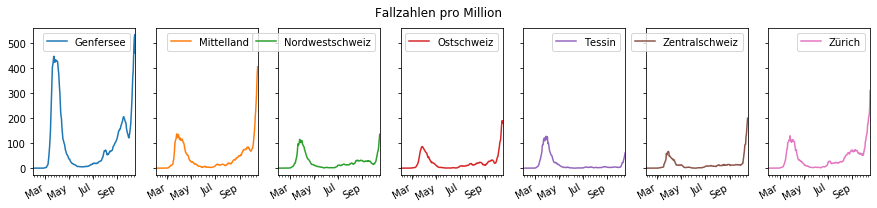

In [34]:
axes = df_inz_reg_pc_7d.plot(subplots=True, layout=(1,7), sharey=True, figsize=(15,3), title="Fallzahlen pro Million")
axes[0][0].xaxis.set_major_locator(mdates.MonthLocator(interval=2))
axes[0][0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

- Fill between

In [35]:
import matplotlib.pyplot as plt

In [45]:
x_values = df_inz_reg_pc_7d.index
y_mins = df_inz_reg_pc_7d.min(axis=1)
y_maxes = df_inz_reg_pc_7d.max(axis=1)
y_median = df_inz_reg_pc_7d.median(axis=1)

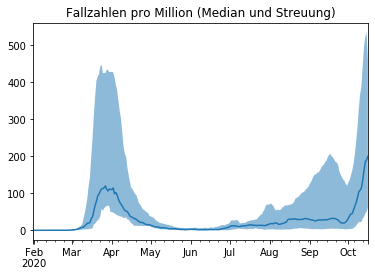

In [47]:
y_median.plot(figsize=(6,4), title='Fallzahlen pro Million (Median und Streuung)')
plt.fill_between(x_values, y_mins, y_maxes, alpha=0.5)